In [2]:
import importlib
import eval_functions
importlib.reload(eval_functions)
from eval_functions import *
import pandas as pd
from enum import Enum
import numpy as n

from IPython.display import display
# make tables interactive
from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True, connected=True)
opt.maxBytes=0

In [3]:
KOFOLA="kofola-c729572"
OLD_KOFOLA="kofola-aba11bc"
KOFOLA_EARLY="kofola_early-8107e45"
SPOT="spot-2.14.2"
SPOT_FORQ="spot-forq-2.14.2"

FORKLIFT="forklift-forklift"
RABIT="rabit-2.5.1"
BAIT="bait-bait"

# Timeout (in seconds) 
TIMEOUT=120


TOOLS = list(dict.fromkeys([ # small hack so that we get list of unique values (i.e. a set, but also in the given order; see https://stackoverflow.com/questions/1653970/does-python-have-an-ordered-set)
    KOFOLA,
    SPOT,
    OLD_KOFOLA,
    SPOT_FORQ,
    #KOFOLA_EARLY,

    # you can add more tools here directly if needed
]))

BA_TOOLS = list(dict.fromkeys([
    FORKLIFT,
    RABIT,
    BAIT

    # you can add more tools here directly if needed
]))

BENCHES = [
  "autohyper",
  "rabit",
  "termination",
  "pecan",
]

In [4]:
df_all = load_benches_incl(BENCHES, TOOLS, TIMEOUT) # last parameter is timeout
df_ba_all = ba_bench_to_hoa(load_benches_incl(BENCHES, BA_TOOLS, TIMEOUT))
a = load_benches_incl(BENCHES, BA_TOOLS, TIMEOUT)
df_all = left_join_on_name_benchmark(df_all, df_ba_all)
TOOLS.extend(BA_TOOLS) # add the BA tools to the list of tools
#df_incl, df_other = filter_inclusion_pairs_unique(df_all)

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/eval/eval_functions.py:787: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TO' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/eval/eval_functions.py:787: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TO' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/eval/eval_functions.py:787: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'TO' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
/Users/vhavlena/Documents

## Evaluation

In [5]:

print(simple_table_incl(df_all, TOOLS, BENCHES, separately=False))
print(simple_table_incl(df_all, TOOLS, BENCHES, separately=True))

# of automata: 1014
----------------------------------------------------------------------------------------------------
tool                 ✅    ❌     time    time-avg    time-med    TO    ERR    MISSING
-----------------  ----  ----  -------  ----------  ----------  ----  -----  ---------
kofola-c729572     1012     2   141.31        0.14        0.00     2      0          0
spot-2.14.2         986    28   121.84        0.12        0.00     2     26          0
kofola-aba11bc     1012     2   183.40        0.18        0.00     2      0          0
spot-forq-2.14.2    960    54  1133.91        1.18        0.00    52      2          0
forklift-forklift   971    35  1273.23        1.31        0.09    35      0          8
rabit-2.5.1         949    57  4300.34        4.53        0.21    39     18          8
bait-bait           942    64  1981.49        2.10        0.12    64      0          8
--------------------------------------------------------------------------------------------------

In [6]:
TOOL_FOR_COMPARISON = KOFOLA

### Time

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


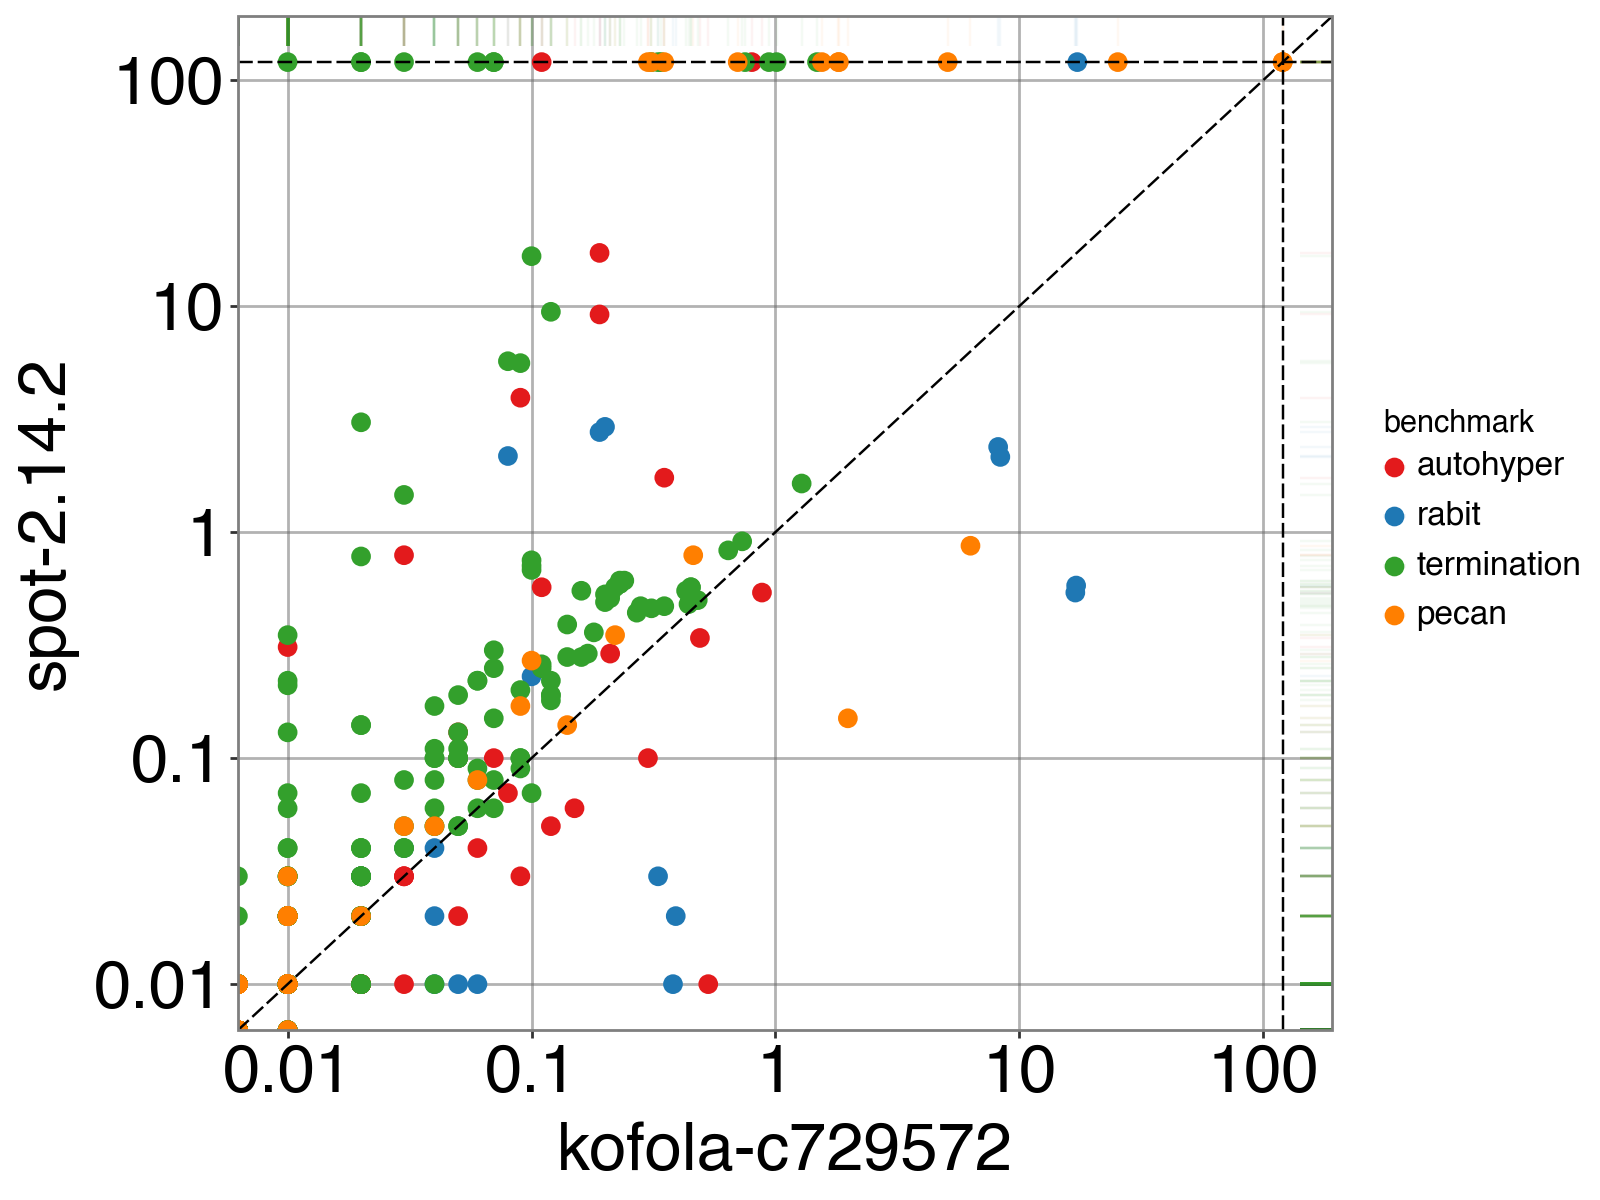

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


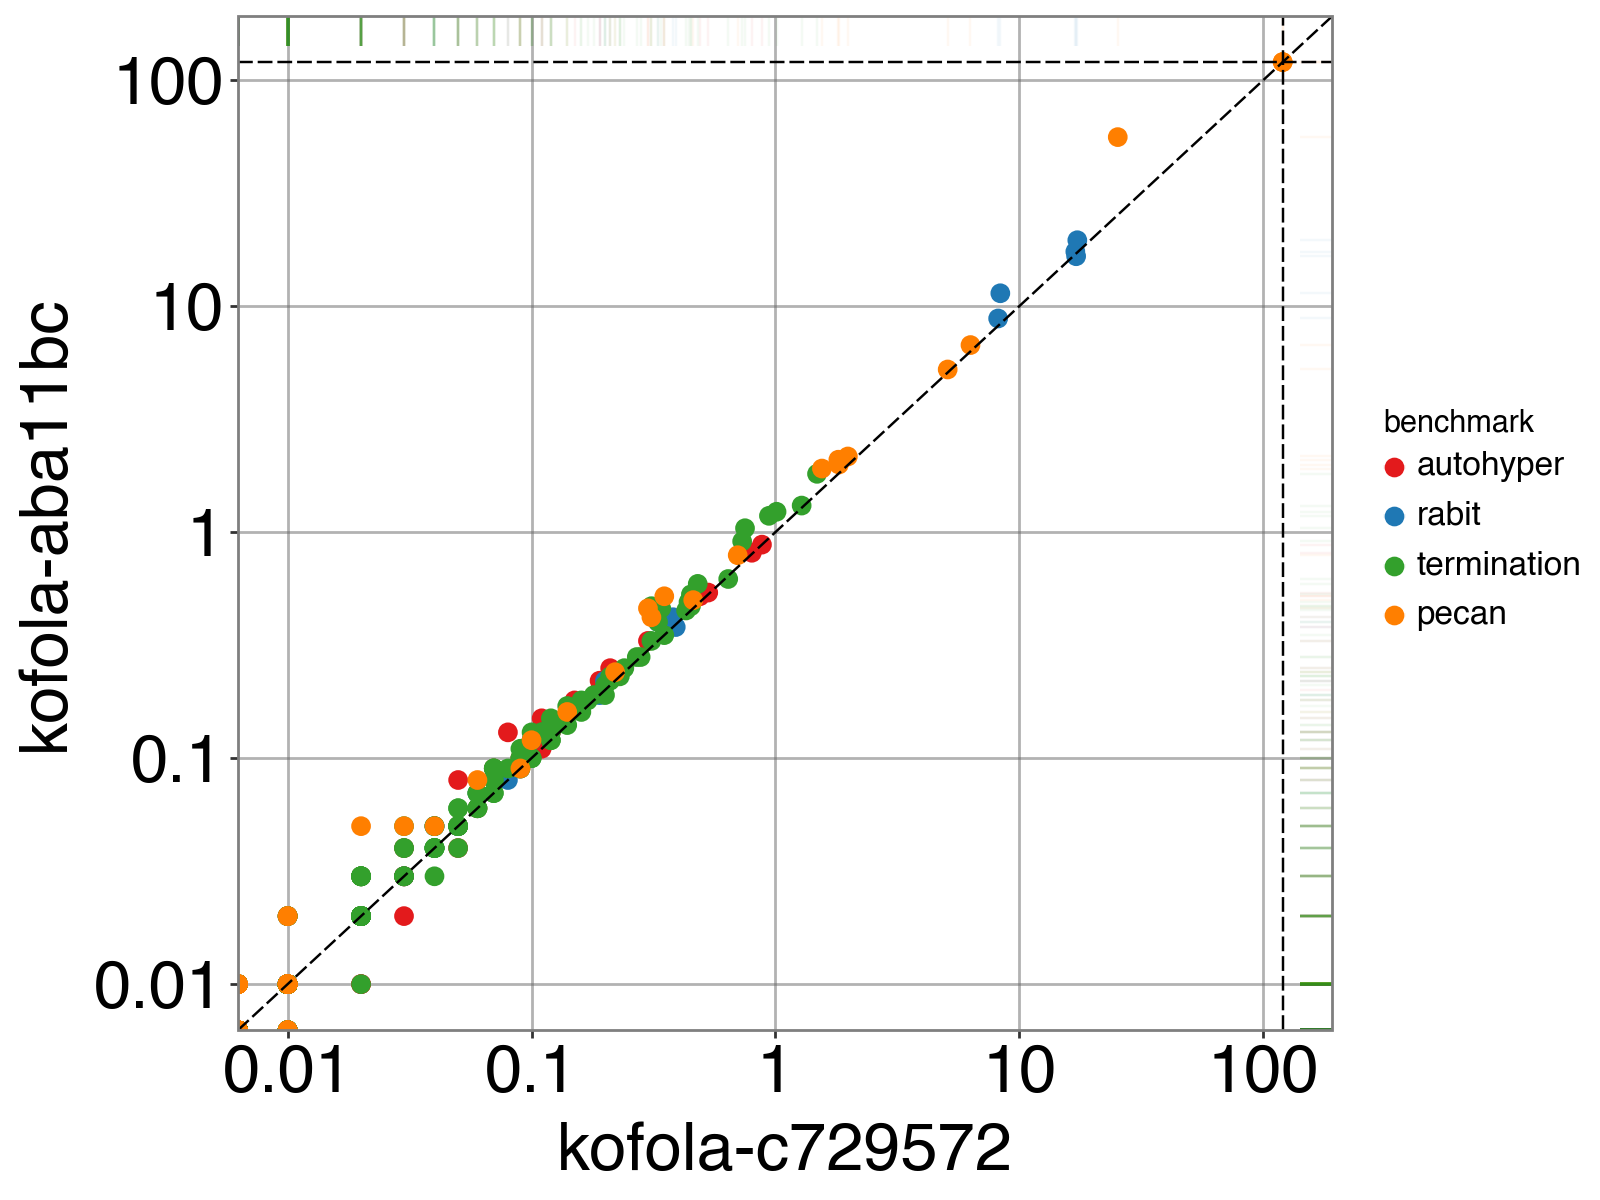

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


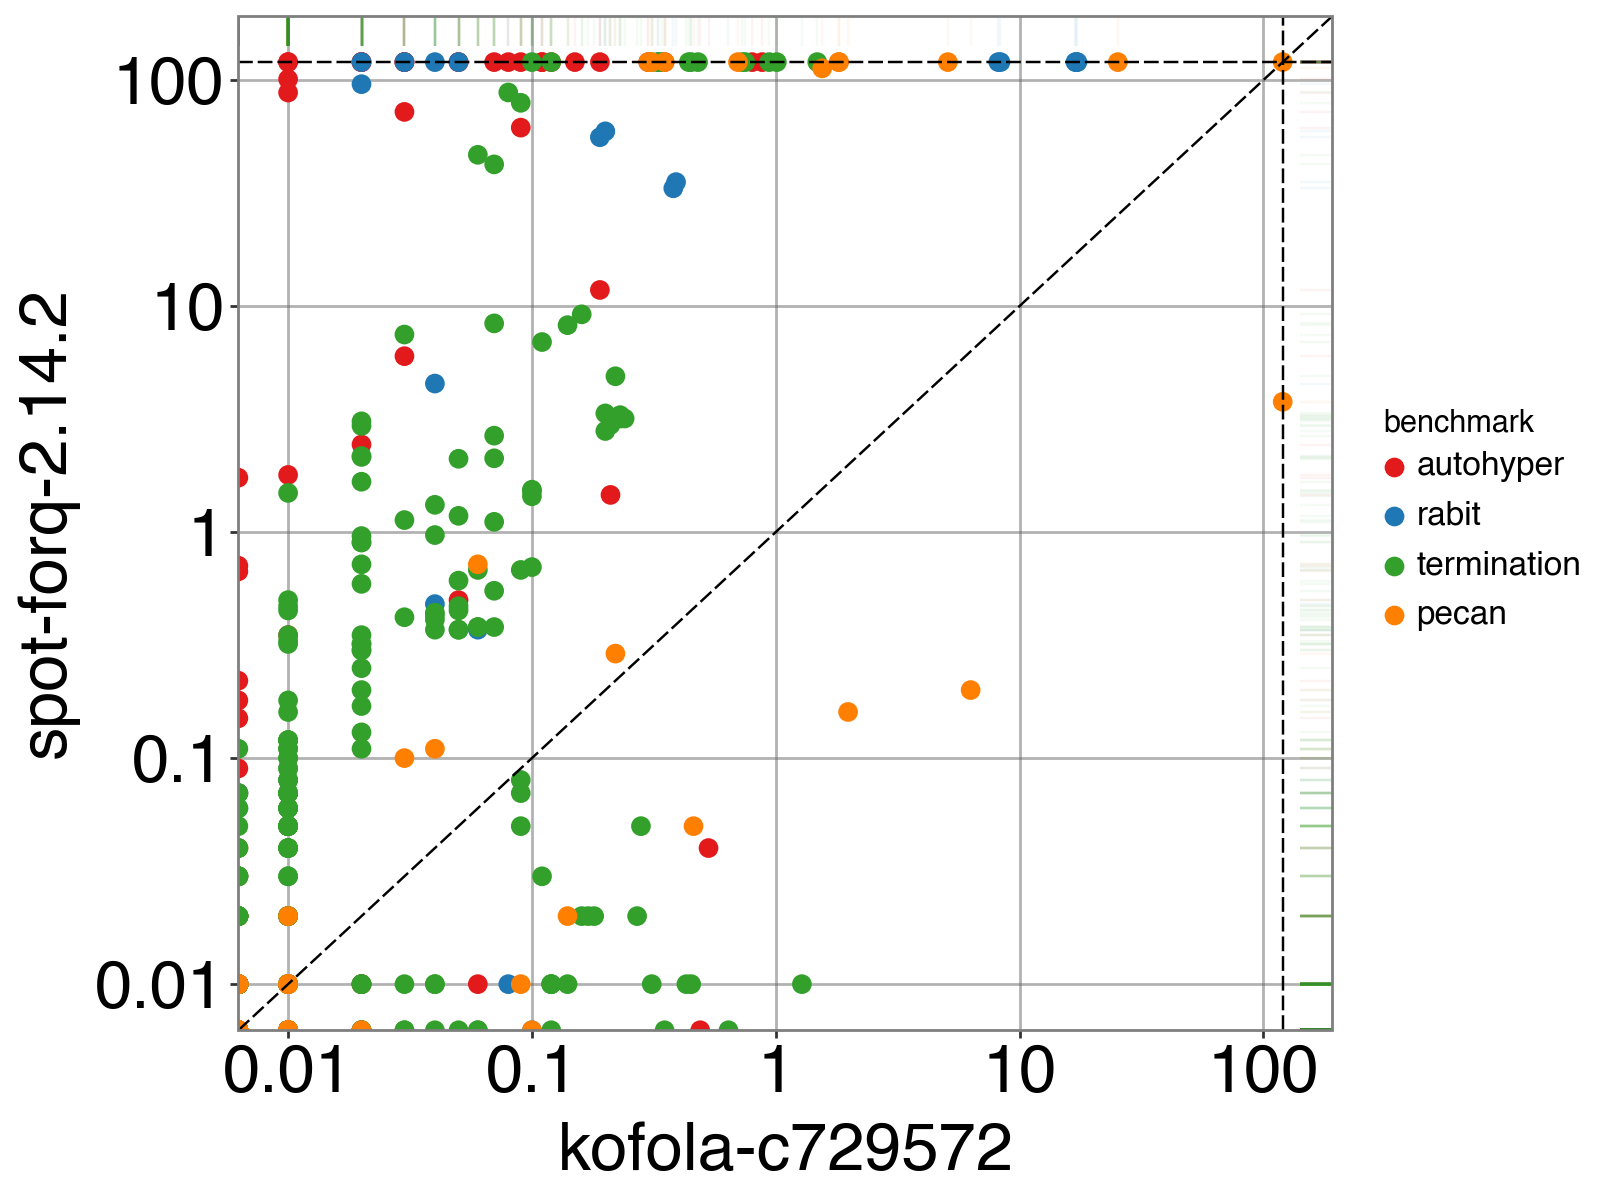

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


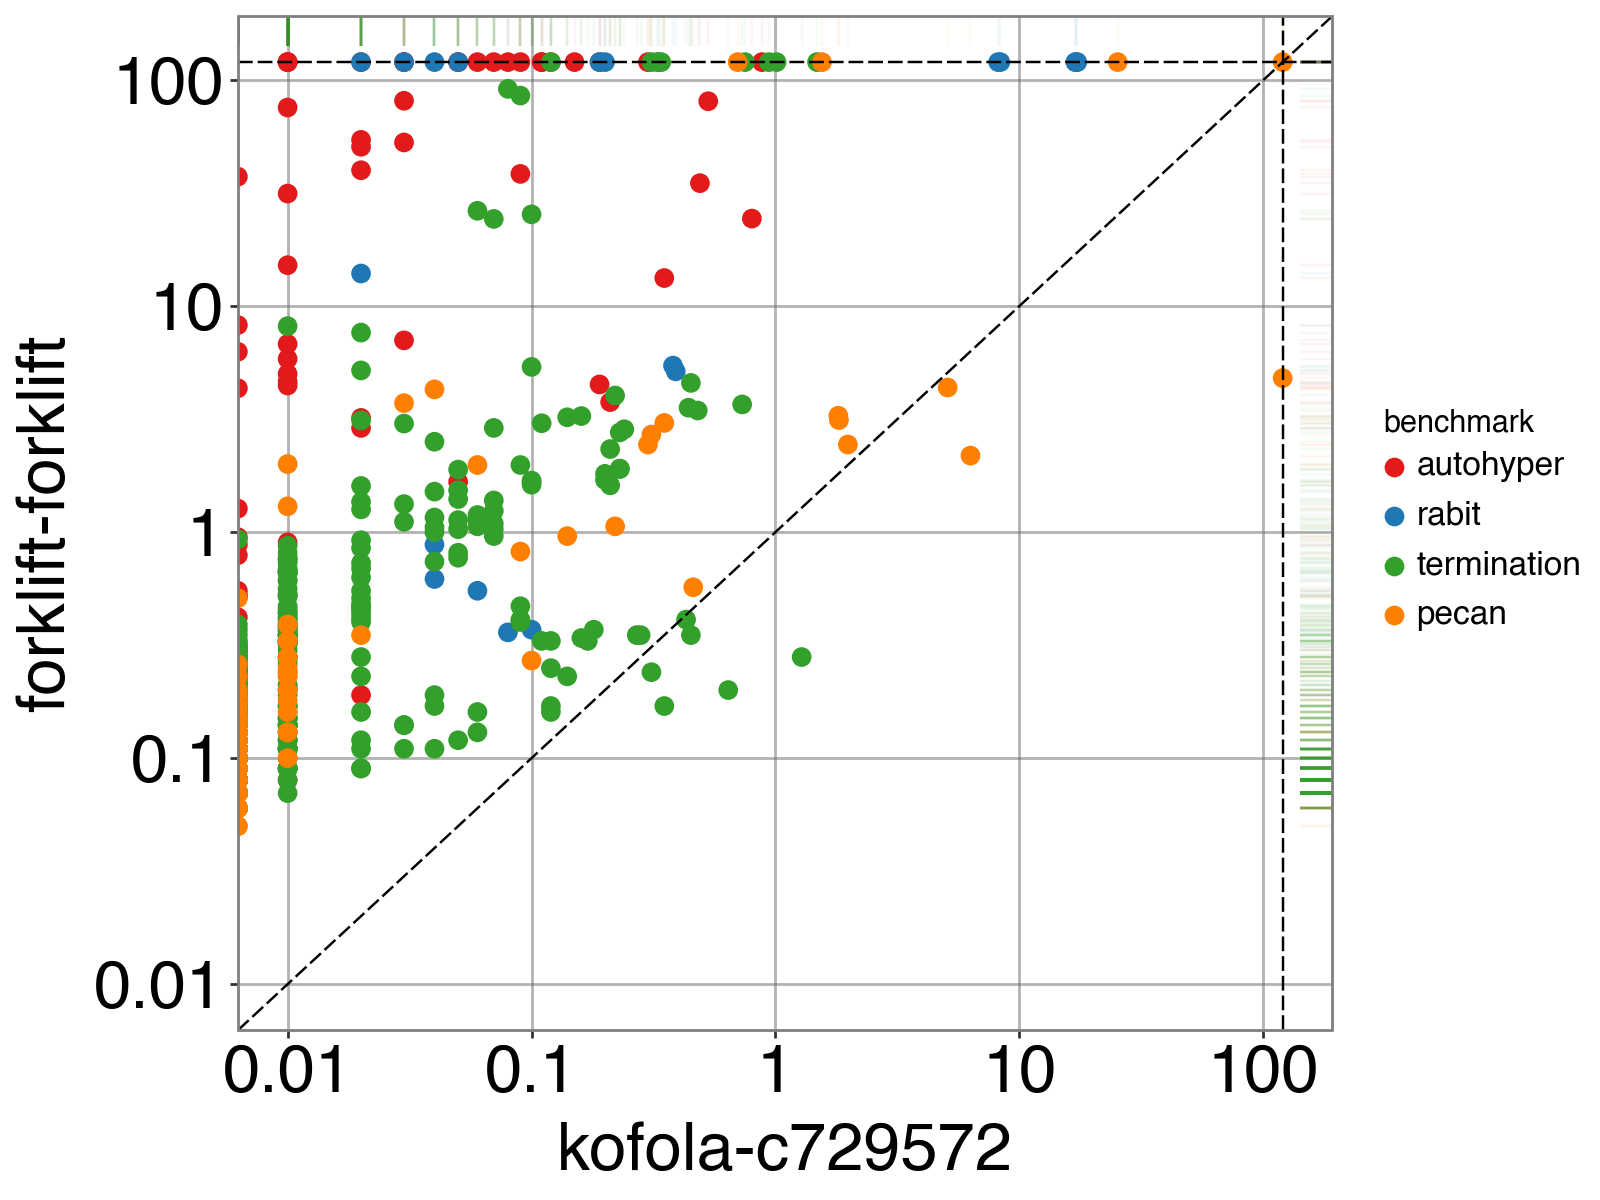

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


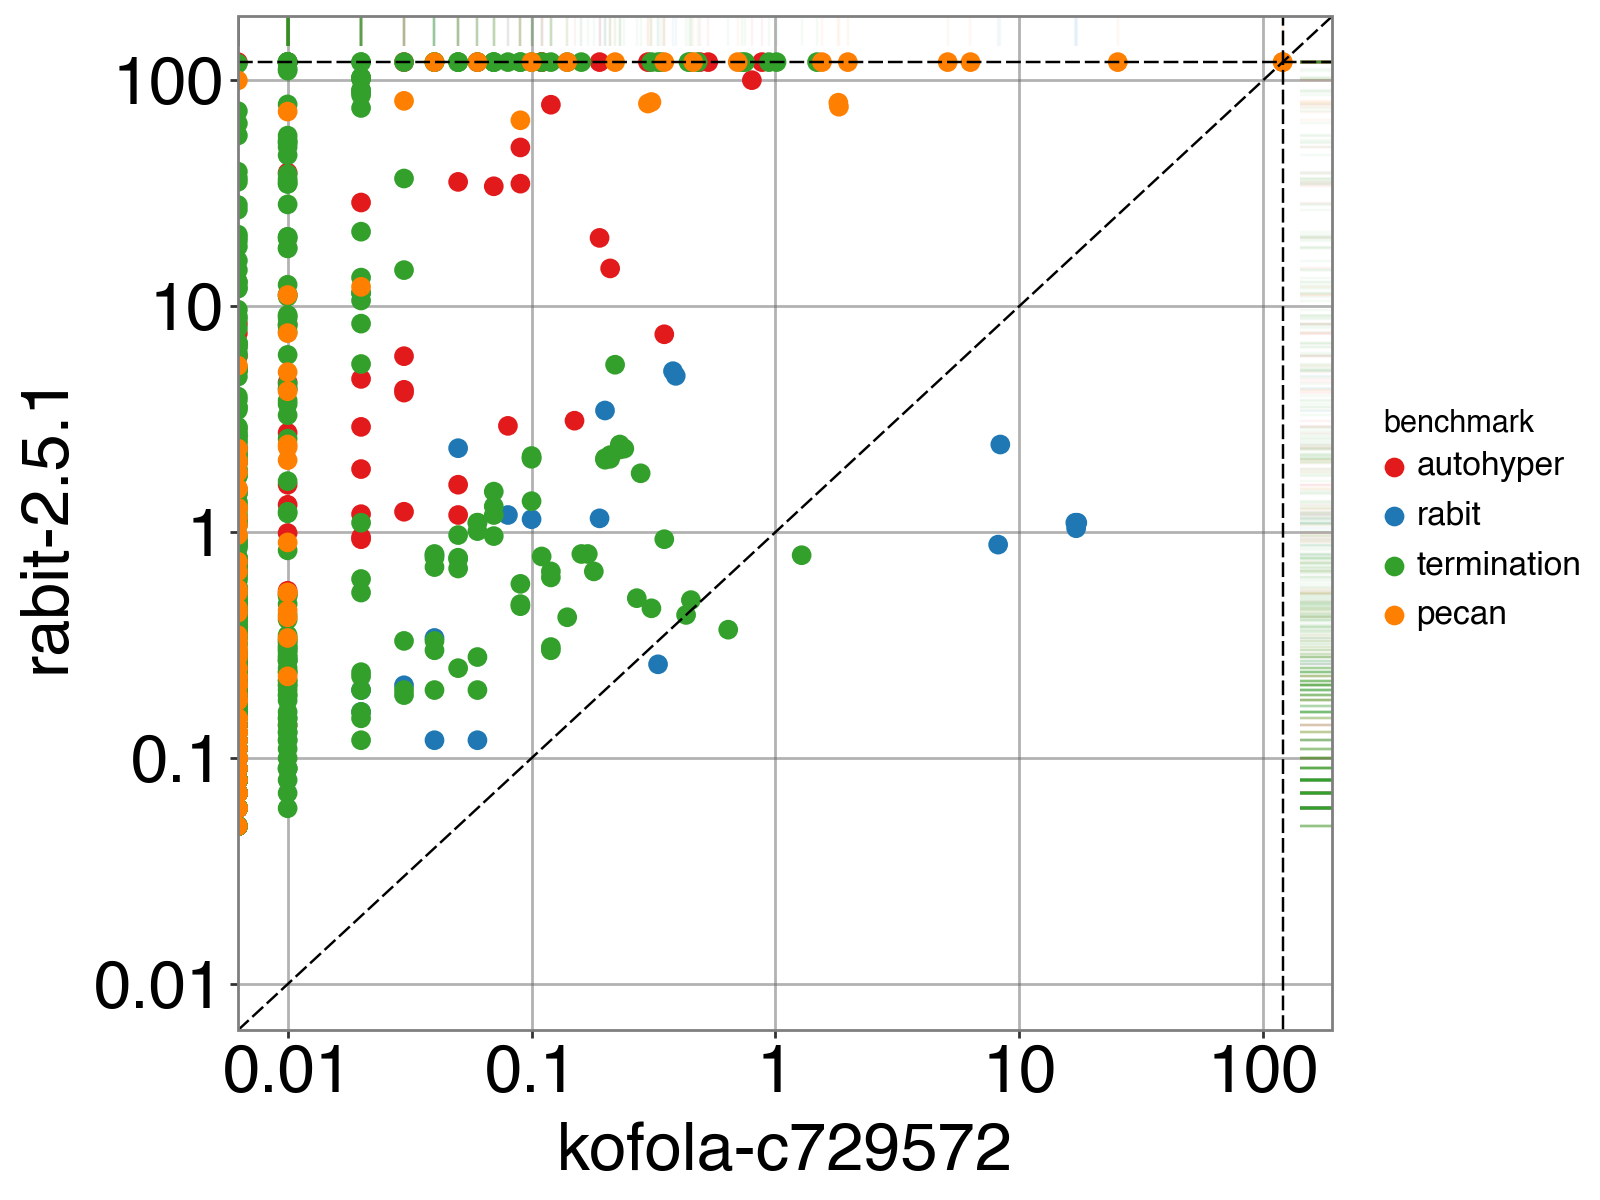

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


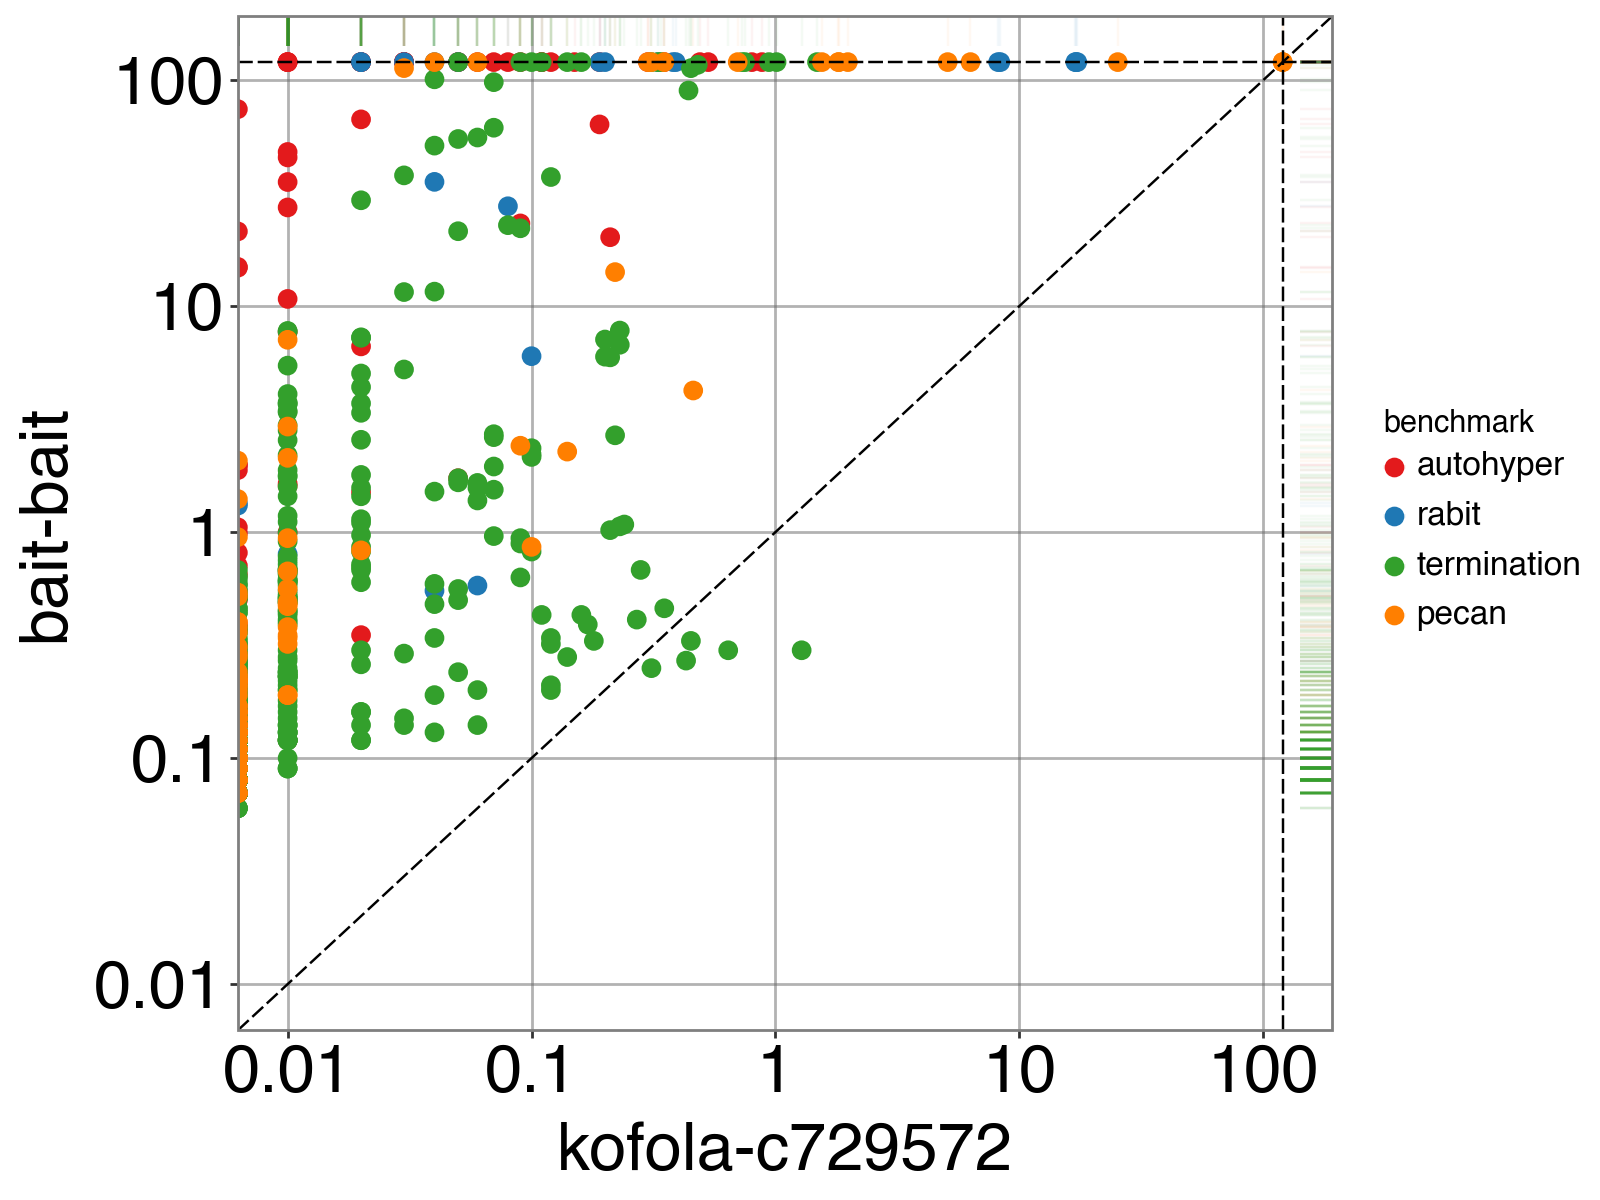

In [7]:
for tool in TOOLS:
    if tool != TOOL_FOR_COMPARISON:
        display(scatter_plot(df_all, TOOL_FOR_COMPARISON, tool, color_column="benchmark", timeout=TIMEOUT, legend_name_map={"advanced_automata_termination":"termination"}))

### More detailed evaluation

In [8]:
sanity_check(df_all, TOOL_FOR_COMPARISON, [tool for tool in TOOLS if tool!=TOOL_FOR_COMPARISON])

Loading ITables v2.4.4 from the internet... (need help?)


In [9]:
get_errors_incl(df_all, TOOL_FOR_COMPARISON)

Loading ITables v2.4.4 from the internet... (need help?)


In [10]:
get_solved_incl(df_all, TOOL_FOR_COMPARISON)

Loading ITables v2.4.4 from the internet... (need help?)


In [11]:
get_timeouts_incl(df_all, TOOL_FOR_COMPARISON)

Loading ITables v2.4.4 from the internet... (need help?)


# LaTeX Tables

In [12]:
BENCHMARK_TO_LATEX = {
    # Benchmark names.
    "autohyper": "AutoHyper",
    "termination": "Termination",
    "pecan": "Pecan",
    "rabit": "Concurrent"
}
TOOLS_PAPER = list(dict.fromkeys([
    KOFOLA,
    SPOT,
    SPOT_FORQ,
    FORKLIFT,
    RABIT,
    BAIT
]))
TOOL_MAP = {
    KOFOLA: "Kofola",
    SPOT: "Spot(Det)",
    SPOT_FORQ: "Spot(FORQ)",
    FORKLIFT: "Forklift",
    RABIT: "Rabit",
    BAIT: "Bait",
}
df_stats = build_inclusion_stats_df(df_all, TOOLS_PAPER, BENCHES, tool_for_comparison=TOOL_FOR_COMPARISON)
df_stats

Loading ITables v2.4.4 from the internet... (need help?)


In [13]:
print(inclusion_stats_to_latex(df_stats))

\begin{tabular}{lrlrrrrrr}
\toprule
 & solved & time & avg & med & OOR & wins & loses & missing \\
tool &  &  &  &  &  &  &  &  \\
\midrule
kofola-c729572 & 1012 & 141.31 & 0.139634 & 0.000000 & 2 & 0 & 0 & 0 \\
spot-2.14.2 & 986 & 121.84 & 0.123570 & 0.000000 & 28 & 263 & 56 & 0 \\
spot-forq-2.14.2 & 960 & 1133.91 & 1.181156 & 0.000000 & 54 & 307 & 89 & 0 \\
forklift-forklift & 971 & 1273.23 & 1.311256 & 0.090000 & 35 & 997 & 9 & 8 \\
rabit-2.5.1 & 949 & 4300.34 & 4.531444 & 0.210000 & 57 & 996 & 8 & 8 \\
bait-bait & 942 & 1981.49 & 2.103493 & 0.120000 & 64 & 1000 & 5 & 8 \\
\bottomrule
\end{tabular}



/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


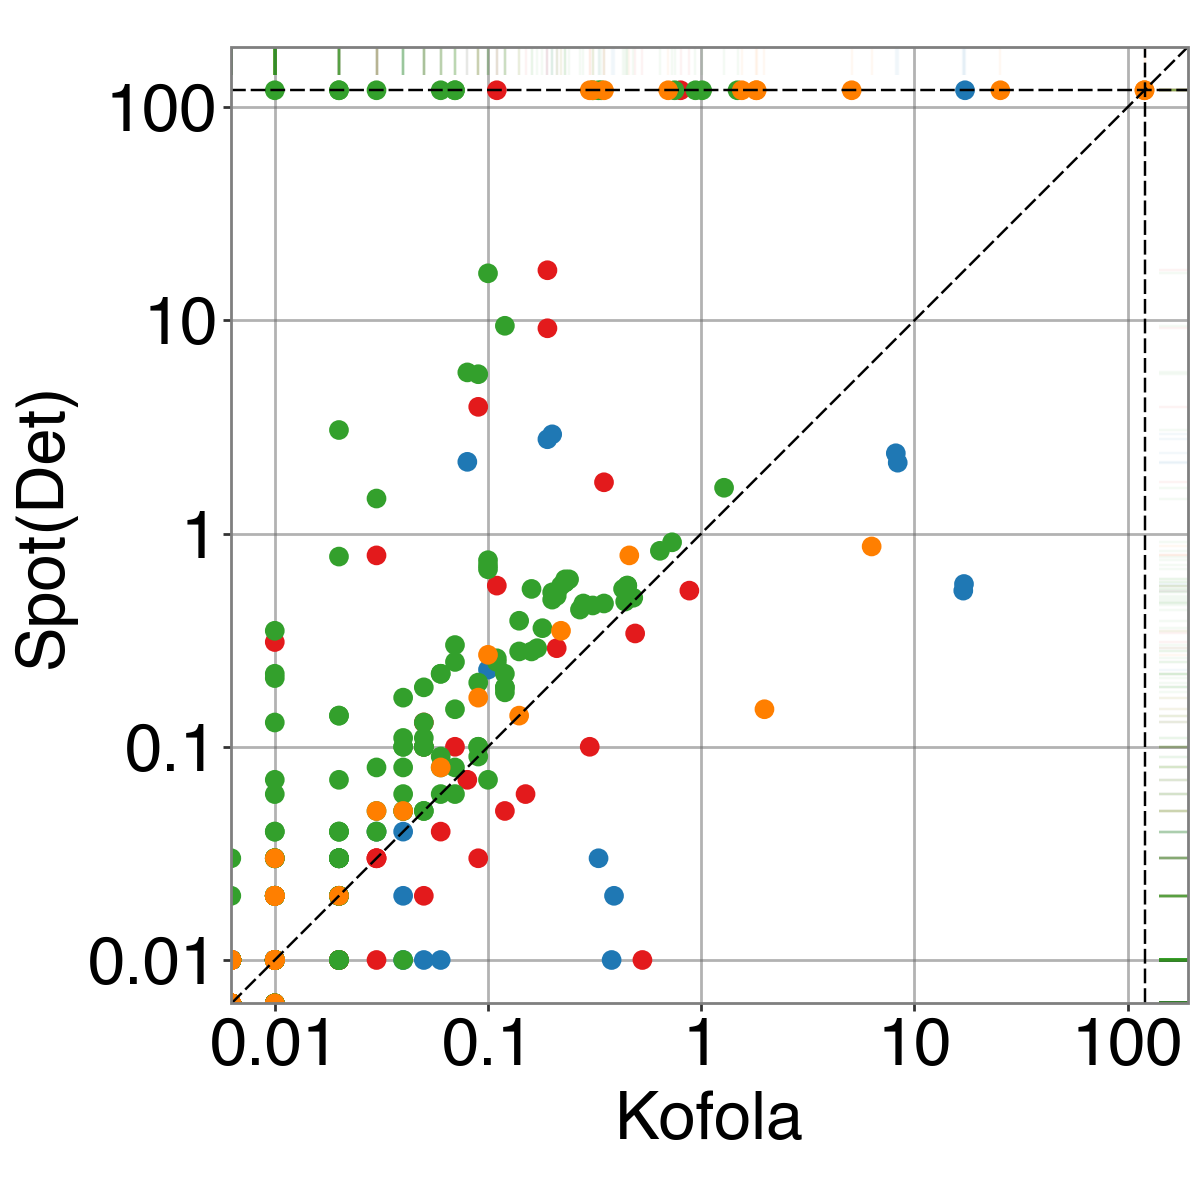

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


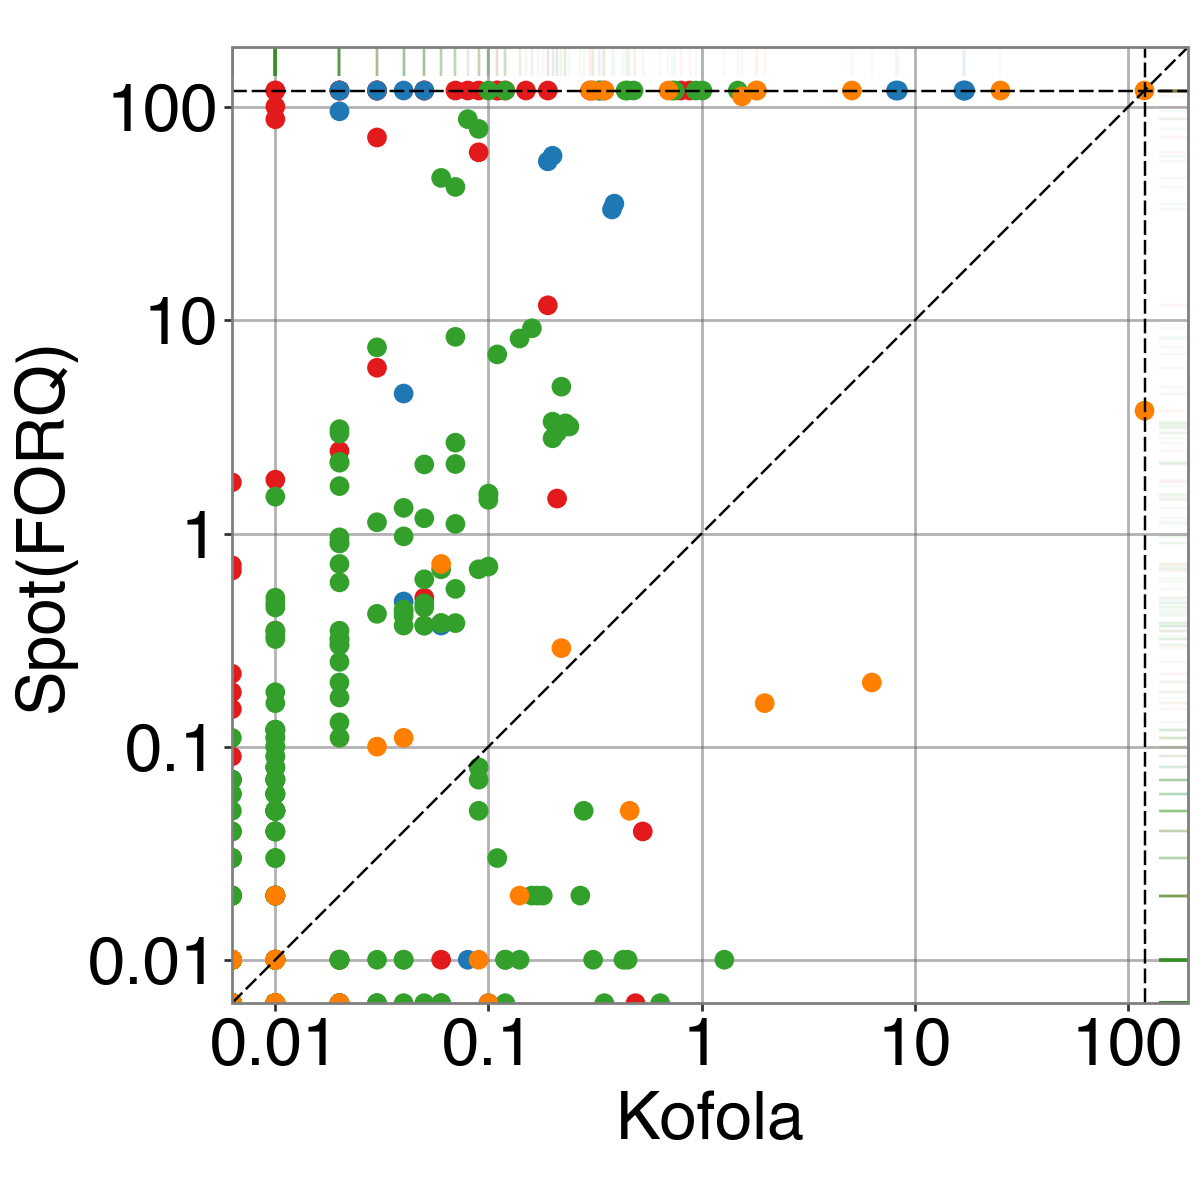

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


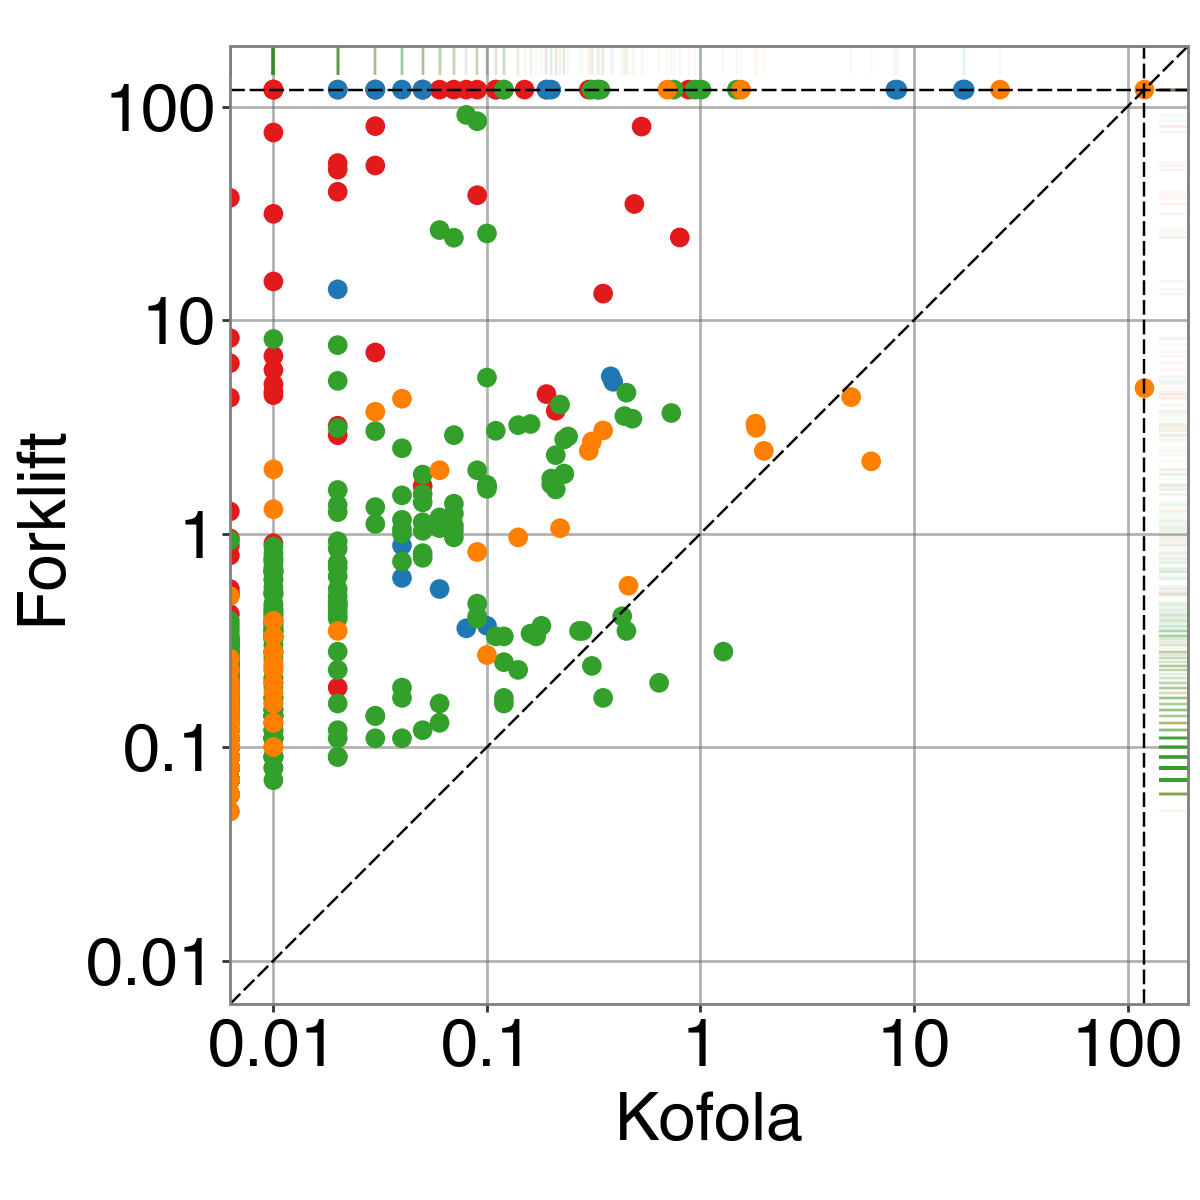

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


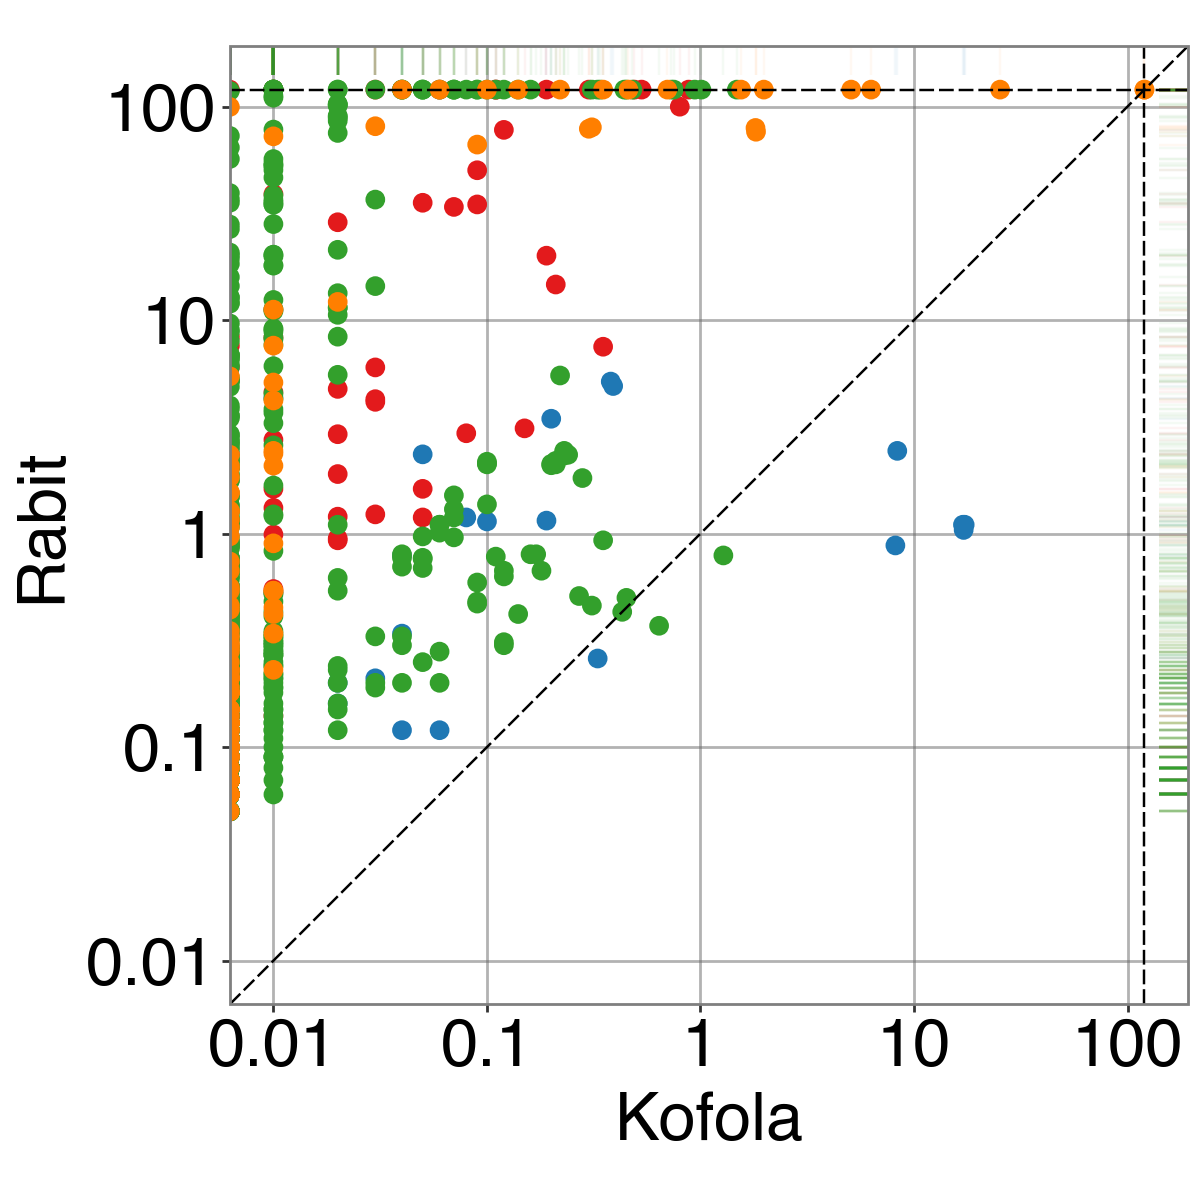

/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
/Users/vhavlena/Documents/VeriFIT/Repo/Buchi complementation/ba-compl-eval/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10


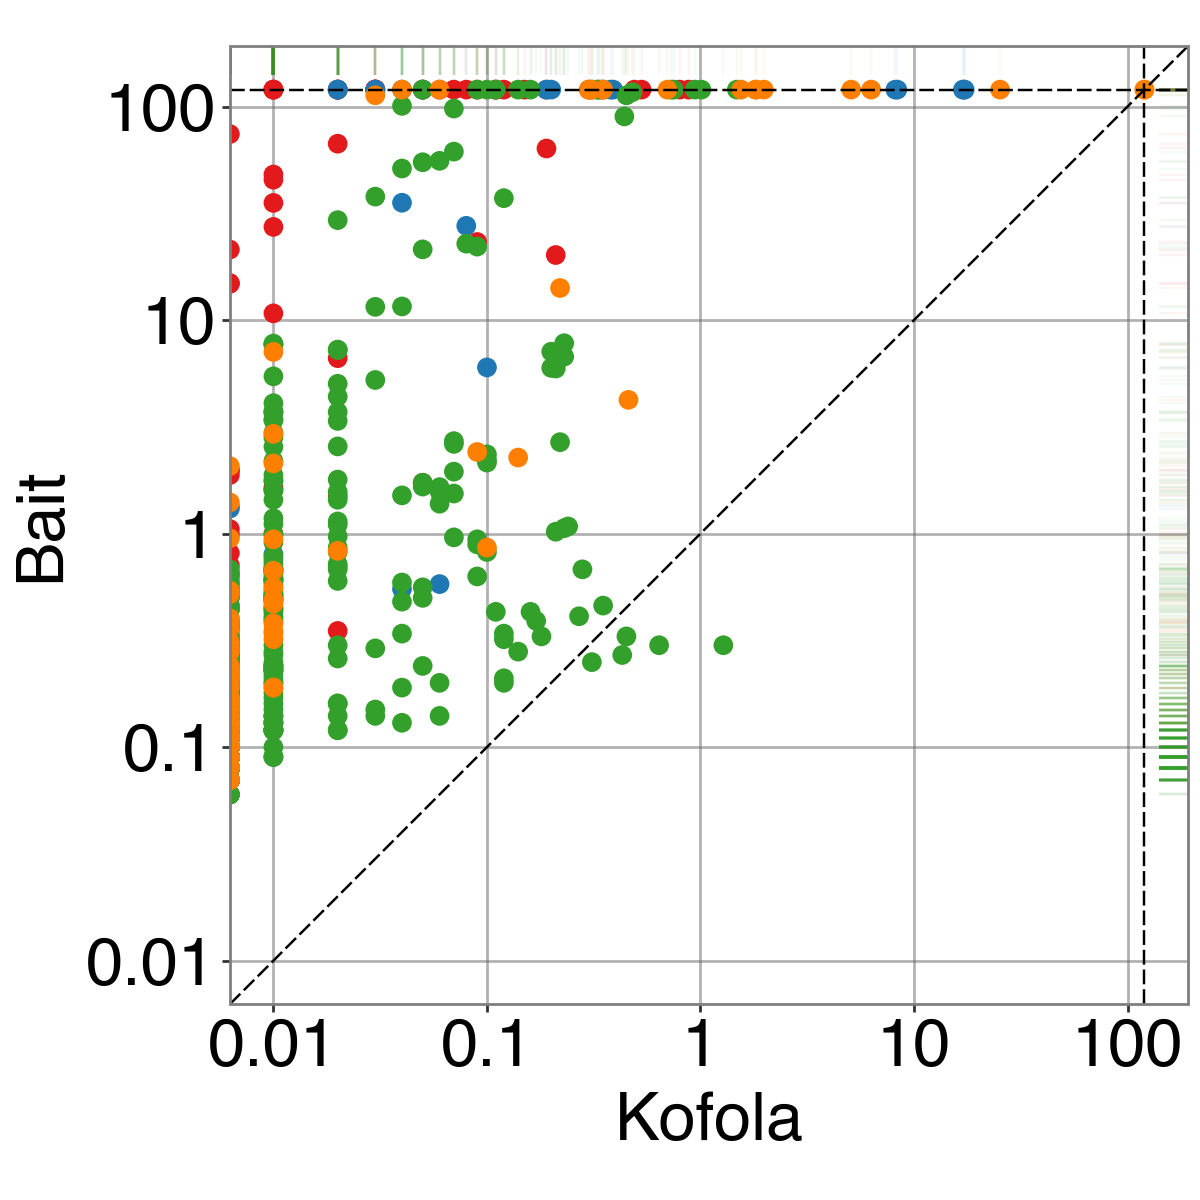

In [14]:
for tool in TOOLS_PAPER:
    if tool != TOOL_FOR_COMPARISON:
        display(scatter_plot(df_all, TOOL_FOR_COMPARISON, tool, color_column="benchmark", timeout=TIMEOUT, legend_name_map=BENCHMARK_TO_LATEX, tool_name_map=TOOL_MAP, show_legend=False, file_name_to_save=f"incl_{TOOL_FOR_COMPARISON}_{tool}"))

In [15]:
get_missing_incl(df_all, FORKLIFT)

Loading ITables v2.4.4 from the internet... (need help?)
